In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms
import numpy as np

%matplotlib inline

In [2]:
!pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
      --------------------------------------- 0.1/9.2 MB 3.6 MB/s eta 0:00:03
     - -------------------------------------- 0.4/9.2 MB 5.5 MB/s eta 0:00:02
     --- ------------------------------------ 0.9/9.2 MB 6.8 MB/s eta 0:00:02
     ------ --------------------------------- 1.4/9.2 MB 8.3 MB/s eta 0:00:01
     -------- ------------------------------- 1.9/9.2 MB 8.6 MB/s eta 0:00:01
     --------- ------------------------------ 2.2/9.2 MB 8.4 MB/s eta 0:00:01
     ----------- ---------------------------- 2.6/9.2 MB 8.2 MB/s eta 0:00:01
     -------------- ------------------------- 3.3/9.2 MB 9.2 MB/s eta 0:00:01
     ----------------- ---------------------- 4.0/9.2 MB 9.9 MB/s eta 0:00:01
     --------------------- ------------------ 4.9/9.2 MB 11.1 MB/s eta 0:00:01
     ----------------------- ---------------- 5.3/9.2 MB 10.5 MB/s eta 0:00:01
     ------------------------- -------------- 5.8/9.2 MB 10.6 MB/s et

In [35]:
df = pd.read_csv('airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [36]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [37]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [38]:
df.dropna(axis = 0, inplace = True)

In [39]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [40]:
df.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [42]:
df['Month'] = pd.to_datetime(df['Month'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [44]:
df.set_index('Month', inplace=True)

In [45]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

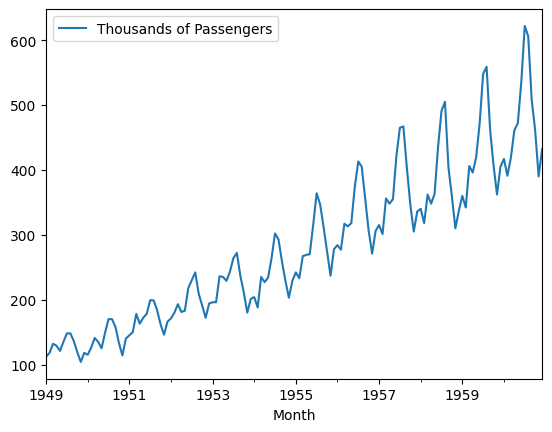

In [46]:
df.plot()

In [47]:
from statsmodels.tsa.stattools import adfuller

In [48]:
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Stats : {result[0]}")
    print(f"p-value : {result[1]}")
    print(result)
    if result[1] <= 0.5:
        print("Reject null hypothesis indicating that data is stationary")
    else:
        print("Accept the null hypothesis indicating it is non-stationary")

In [49]:
adf_test(df)

ADF Stats : 0.8153688792060457
p-value : 0.991880243437641
(0.8153688792060457, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
Accept the null hypothesis indicating it is non-stationary


In [50]:
## As data is non stationary we have to do differencing

In [51]:
df['Passengers first difference'] = df["Thousands of Passengers"] - df["Thousands of Passengers"].shift(1) 

In [52]:
df.head()

,Thousands of Passengers,Passengers first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [53]:
adf_test(df['Passengers first difference'].dropna())

ADF Stats : -2.8292668241699963
p-value : 0.05421329028382592
(-2.8292668241699963, 0.05421329028382592, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854084)
Reject null hypothesis indicating that data is stationary


In [54]:
df['Passengers second difference'] = df['Passengers first difference'] - df['Passengers first difference'].shift(1)

In [55]:
df.head()

,Thousands of Passengers,Passengers first difference,Passengers second difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [56]:
adf_test(df["Passengers second difference"].dropna())

ADF Stats : -16.384231542468502
p-value : 2.7328918500142026e-29
(-16.384231542468502, 2.7328918500142026e-29, 11, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.6020417275606)
Reject null hypothesis indicating that data is stationary


In [57]:
## 12 months differencing

In [58]:
df['Passengers 12 month differnce'] = df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)

In [59]:
adf_test(df['Passengers 12 month differnce'].dropna())

ADF Stats : -3.3830207264924814
p-value : 0.011551493085514954
(-3.3830207264924814, 0.011551493085514954, 1, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 919.527129208137)
Reject null hypothesis indicating that data is stationary


In [60]:
df.head(13)

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 month differnce
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
1949-06-01,135.0,14.0,22.0,NaN
1949-07-01,148.0,13.0,-1.0,NaN
1949-08-01,148.0,0.0,-13.0,NaN
1949-09-01,136.0,-12.0,-12.0,NaN


In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

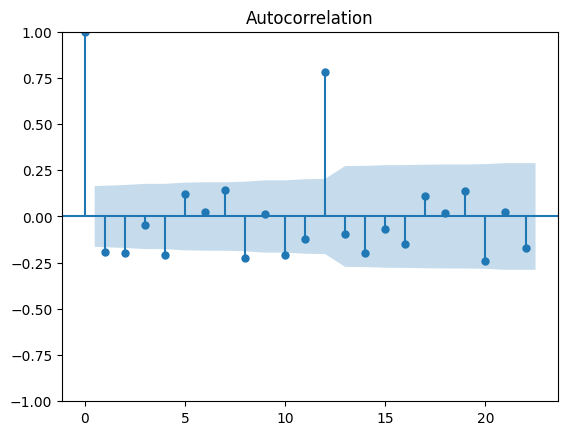

In [63]:
acf = plot_acf(df['Passengers second difference'].dropna())

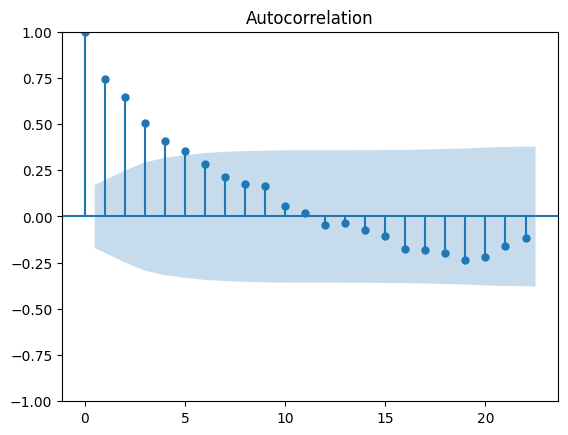

In [64]:
acf = plot_acf(df['Passengers 12 month differnce'].dropna())

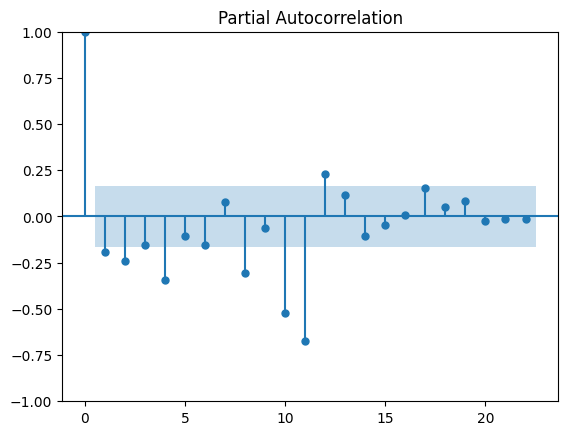

In [65]:
pacf = plot_pacf(df['Passengers second difference'].dropna())

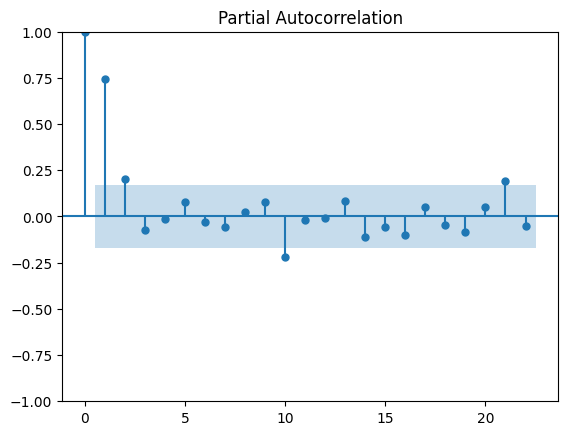

In [66]:
pacf_12=plot_pacf(df['Passengers 12 month differnce'].dropna())

In [67]:
df

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 month differnce
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [70]:
from datetime import datetime
train_data_end = datetime(1955,12,1)
test_data_end = datetime(1960,12,1)

In [75]:
from datetime import timedelta
train_data = df.loc[:train_data_end]
test_data = df[train_data_end+timedelta(days=1):test_data_end]

In [76]:
train_data

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 month differnce
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [74]:
test_data

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 month differnce
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [77]:
## cREATING ARIMA MODEL

In [80]:
from statsmodels.tsa.arima.model import ARIMA

In [87]:
model_ARIMA = ARIMA(df['Thousands of Passengers'], order = (10, 2, 0))

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [88]:
model_ARIMA_fit = model_ARIMA.fit()

In [89]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                  144
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -661.050
Date:                     Wed, 08 Nov 2023   AIC                           1344.100
Time:                             16:01:57   BIC                           1376.614
Sample:                         01-01-1949   HQIC                          1357.312
                              - 12-01-1960                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3722      0.076     -4.921      0.000      -0.520      -0.224
ar.L2         -0.7445      0.070    -10.631      0.000      -0.882      -0.607
ar.L3         -0.3584      0.067     -5.358      0.000      -0.490      -0.227
ar.L4         -0.7950      0.083     -9.567      0.000      -0.958      -0.632
ar.L5         -0.3606      0.106     -3.397      0.001      -0.569      -0.153
ar.L6         -0.6672      0.079     -8.412      0.000      -0.823      -0.512
ar.L7         -0.2608      0.095     -2.742      0.006      -0.447      -0.074
ar.L8         -0.6879      0.094     -7.345      0.000      -0.871      -0.504
ar.L9         -0.2600      0.079     -3.301      0.001      -0.414      -0.106
ar.L10        -0.6414      0.078     -8.264      0.000      -0.793      -0.489
sigma2       614.1796     79.140      7.761      0.000     459.069     769.291
===================================================================================
Ljung-Box (L1) (Q):                  37.01   Jarque-Bera (JB):                 3.51
Prob(Q):                              0.00   Prob(JB):                         0.17
Heteroskedasticity (H):               3.30   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
test_start_date = test_data.index[0]
test_end_date = test_data.index[-1]
print(test_start_date)
print(test_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [91]:
pred = model_ARIMA_fit.predict(start = test_start_date, end = test_end_date)
residual = test_data['Thousands of Passengers']- pred

In [92]:
residual

Month
1956-01-01   -11.691336
1956-02-01    -9.978842
1956-03-01    28.096093
1956-04-01    -9.197076
1956-05-01    -3.829717
1956-06-01    18.709154
1956-07-01    10.945707
1956-08-01     4.027532
1956-09-01   -37.773478
1956-10-01     2.958412
1956-11-01   -27.836094
1956-12-01    27.394452
1957-01-01   -12.645363
1957-02-01   -16.482447
1957-03-01    44.715346
1957-04-01   -17.390955
1957-05-01    -3.157620
1957-06-01    25.728311
1957-07-01    17.344747
1957-08-01     5.218942
1957-09-01   -38.088359
1957-10-01    -5.934317
1957-11-01   -24.914685
1957-12-01    22.296766
1958-01-01   -15.138259
1958-02-01   -23.839232
1958-03-01    31.119218
1958-04-01    -7.937013
1958-05-01    -7.098735
1958-06-01    31.412128
1958-07-01    20.328543
1958-08-01    16.141990
1958-09-01   -72.697190
1958-10-01    32.395771
1958-11-01   -50.451827
1958-12-01    42.006544
1959-01-01   -13.796350
1959-02-01    -6.933138
1959-03-01    42.742433
1959-04-01    -5.586126
1959-05-01   -11.310115
1959-06-01

<Axes: ylabel='Density'>

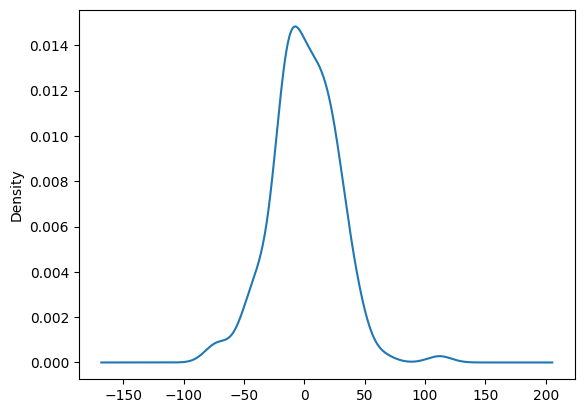

In [95]:
model_ARIMA_fit.resid.plot(kind='kde')

In [96]:
test_data['Predicted data'] = pred

C:\Users\Dell\AppData\Local\Temp\ipykernel_3332\1304069096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted data'] = pred


In [98]:
test_data.head()

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 month differnce,Predicted data
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,295.691336
1956-02-01,277.0,-7.0,-13.0,44.0,286.978842
1956-03-01,317.0,40.0,47.0,50.0,288.903907
1956-04-01,313.0,-4.0,-44.0,44.0,322.197076
1956-05-01,318.0,5.0,9.0,48.0,321.829717


<Axes: xlabel='Month'>

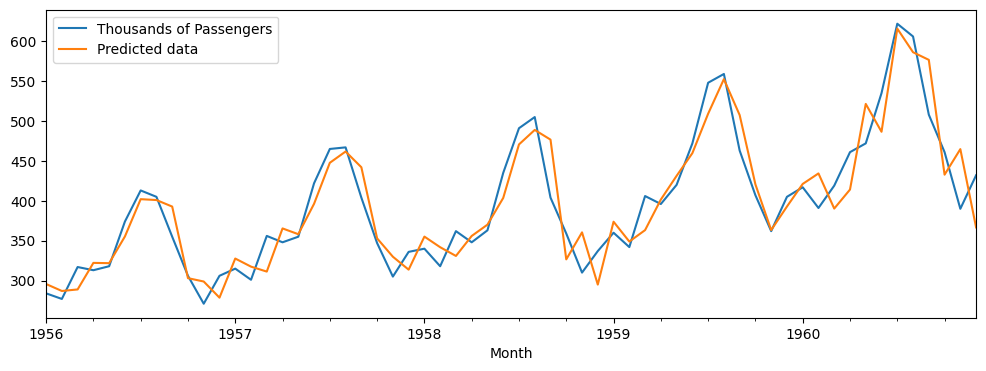

In [99]:
test_data[['Thousands of Passengers', 'Predicted data']].plot(figsize = (12,4))

In [100]:
##CREATING SARIMAX MODEL

In [101]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [102]:
model_SARIMAX = SARIMAX(train_data['Thousands of Passengers'], order=(10,0,5), seasonal_order=(0,1,0,12))

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [111]:
model_SARIMAX_fit = model_SARIMAX.fit()

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [112]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                  144
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -661.050
Date:                     Wed, 08 Nov 2023   AIC                           1344.100
Time:                             16:43:26   BIC                           1376.614
Sample:                         01-01-1949   HQIC                          1357.312
                              - 12-01-1960                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3722      0.076     -4.921      0.000      -0.520      -0.224
ar.L2         -0.7445      0.070    -10.631      0.000      -0.882      -0.607
ar.L3         -0.3584      0.067     -5.358      0.000      -0.490      -0.227
ar.L4         -0.7950      0.083     -9.567      0.000      -0.958      -0.632
ar.L5         -0.3606      0.106     -3.397      0.001      -0.569      -0.153
ar.L6         -0.6672      0.079     -8.412      0.000      -0.823      -0.512
ar.L7         -0.2608      0.095     -2.742      0.006      -0.447      -0.074
ar.L8         -0.6879      0.094     -7.345      0.000      -0.871      -0.504
ar.L9         -0.2600      0.079     -3.301      0.001      -0.414      -0.106
ar.L10        -0.6414      0.078     -8.264      0.000      -0.793      -0.489
sigma2       614.1796     79.140      7.761      0.000     459.069     769.291
===================================================================================
Ljung-Box (L1) (Q):                  37.01   Jarque-Bera (JB):                 3.51
Prob(Q):                              0.00   Prob(JB):                         0.17
Heteroskedasticity (H):               3.30   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [135]:
test_start_date = test_data.index[0]
test_end_date = test_data.index[-1]
pred1 = model_SARIMAX_fit.predict(start = test_start_date, end=test_end_date)

In [138]:
residuals = test_data['Thousands of Passengers']-pred1
residuals

Month
1956-01-01     -3.900570
1956-02-01     -6.401713
1956-03-01      1.379653
1956-04-01     -4.562414
1956-05-01      6.662309
1956-06-01     17.928224
1956-07-01     10.147957
1956-08-01     15.743385
1956-09-01     -3.221679
1956-10-01    -10.844083
1956-11-01     -4.751947
1956-12-01     -7.258390
1957-01-01     -9.454003
1957-02-01    -20.683401
1957-03-01     -0.984525
1957-04-01     -6.676190
1957-05-01      8.863307
1957-06-01     33.515429
1957-07-01     28.258954
1957-08-01     42.786819
1957-09-01      9.935650
1957-10-01     -2.790142
1957-11-01     -1.894553
1957-12-01     -7.540852
1958-01-01    -15.241963
1958-02-01    -35.337719
1958-03-01    -26.150047
1958-04-01    -36.255938
1958-05-01    -11.226260
1958-06-01     18.586722
1958-07-01     26.400499
1958-08-01     52.420118
1958-09-01    -17.594848
1958-10-01    -17.336207
1958-11-01    -22.409282
1958-12-01    -31.935078
1959-01-01    -20.470345
1959-02-01    -36.630334
1959-03-01     -6.749120
1959-04-01    -12.0

In [139]:
test_data['SARIMAX_PRED']= pred1

C:\Users\Dell\AppData\Local\Temp\ipykernel_3332\4035127330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['SARIMAX_PRED']= pred1


In [141]:
test_data

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 month differnce,Predicted data,SARIMAX_PRED
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,295.691336,287.900570
1956-02-01,277.0,-7.0,-13.0,44.0,286.978842,283.401713
1956-03-01,317.0,40.0,47.0,50.0,288.903907,315.620347
1956-04-01,313.0,-4.0,-44.0,44.0,322.197076,317.562414
1956-05-01,318.0,5.0,9.0,48.0,321.829717,311.337691
1956-06-01,374.0,56.0,51.0,59.0,355.290846,356.071776
1956-07-01,413.0,39.0,-17.0,49.0,402.054293,402.852043
1956-08-01,405.0,-8.0,-47.0,58.0,400.972468,389.256615
1956-09-01,355.0,-50.0,-42.0,43.0,392.773478,358.221679


<Axes: xlabel='Month'>

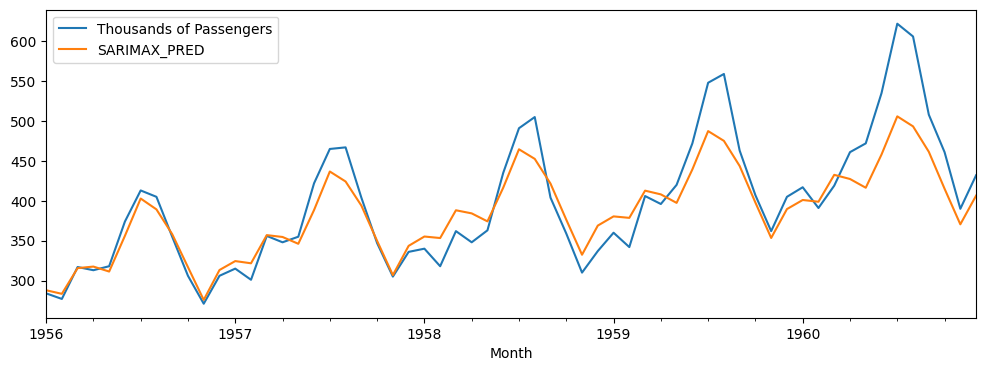

In [142]:
test_data[['Thousands of Passengers','SARIMAX_PRED']].plot(figsize=(12,4)) 